題目: 將Kaggle Dataset SMS文件以機器學習方式分辨是否為垃圾郵件
說明：輸入文件spam.csv是一個至少有兩欄v1和v2的csv檔，v1註明該簡訊是ham還是spam，v2是sms內容本身，
我們在讀入後先去掉不必要的欄位內容，將欄位名稱改為labels和data，再將labels內容改成0/1，0
代表ham1代表spam。接著將內容切割成訓練集和測試集，再用tokenizer做前處理，最後形成可以分析的格式。
建模分析之後我們印出訓練和測試準確度，然後以word cloud畫出spam和ham常用的字，
再分別印出判斷錯誤的SMS供未來改進。
延伸:可用不同的tokenizer，不同的ML分類器做改進準確率的比較。
範例程式檔名: spam_sms_垃圾簡訊偵測器.py，以Naïve Bayes (MultinomialNB) 方式完成
模組: sklearn, pandas, numpy, wordcloud
輸入檔：spam.csv
成績：辨識百分率
進一步說明：
在這個習題中，我們從Kaggle下載SMS簡訊資料，經由前處理之後判斷是否為SPAM
並畫出垃圾字雲來

以下是本習題要做的

1.前處理：
 刪除不必要的欄位
 重新命名欄位
 二元數位化標記(labels)
 分為訓練與測試組

2.特徵：可選用 Count or TF-IDF
3.建模，訓練，印出
4.列出判斷錯的

In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [2]:
# 資料來自：
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
df = pd.read_csv('C:/Users/User/Documents/Python Scripts/nlp/data/spam.csv', encoding='ISO-8859-1')

# 刪除不必要的欄位
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# 重新命名欄位
df.columns = ['labels', 'data']

# 二元數位化標記(labels)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [3]:
# 分為訓練與測試組
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [4]:
df_train

1045                                  Come round, it's . 
1312    I love u 2 babe! R u sure everything is alrite...
1149                               Not a drop in the tank
3478    Be sure to check your yahoo email. We sent pho...
1135                      K do I need a login or anything
                              ...                        
5386                             I'm at work. Please call
2718    18 days to Euro2004 kickoff! U will be kept in...
2011    Do whatever you want. You know what the rules ...
3825    Goodmorning,my grandfather expired..so am on l...
846     My stomach has been thru so much trauma I swea...
Name: data, Length: 3733, dtype: object

In [5]:
# 方法1:以TF-IDF 為特徵
tfidf = TfidfVectorizer(decode_error='ignore', stop_words='english', max_features=1500)
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

In [12]:
tfidf.get_feature_names()[10:100]

['0870',
 '08712300220',
 '08712460324',
 '08718720201',
 '10',
 '100',
 '1000',
 '10am',
 '10p',
 '11',
 '11mths',
 '12',
 '12hrs',
 '150',
 '150p',
 '150ppm',
 '16',
 '18',
 '1st',
 '20',
 '200',
 '2000',
 '2003',
 '2004',
 '20p',
 '25',
 '250',
 '25p',
 '28',
 '2lands',
 '2mrw',
 '2nd',
 '2nite',
 '2optout',
 '30',
 '3030',
 '350',
 '36504',
 '3mins',
 '3rd',
 '400',
 '40gb',
 '434',
 '440',
 '4th',
 '4u',
 '50',
 '500',
 '5000',
 '50p',
 '62468',
 '6hrs',
 '750',
 '7pm',
 '800',
 '8007',
 '80488',
 '83355',
 '85023',
 '8552',
 '86688',
 '87066',
 '87077',
 '87575',
 '8th',
 '900',
 'abi',
 'abiola',
 'able',
 'abt',
 'ac',
 'accept',
 'account',
 'action',
 'activate',
 'actually',
 'add',
 'added',
 'address',
 'admirer',
 'advance',
 'advice',
 'aft',
 'afternoon',
 'age',
 'age16',
 'ago',
 'ah',
 'aha',
 'ahead']

In [15]:
tfidf.vocabulary_

{'come': 286,
 'round': 1089,
 'love': 763,
 'babe': 151,
 'sure': 1245,
 'alrite': 109,
 'txt': 1339,
 'bak': 156,
 'drop': 398,
 'check': 254,
 'yahoo': 1478,
 'email': 416,
 'sent': 1132,
 'photos': 953,
 'yesterday': 1487,
 'need': 870,
 'login': 746,
 'month': 838,
 '50': 56,
 'calls': 223,
 'ur': 1360,
 'standard': 1208,
 'network': 873,
 'charge': 249,
 'activate': 84,
 'net': 872,
 'cost': 311,
 'min': 813,
 'class': 269,
 'lt': 770,
 'gt': 555,
 'asked': 131,
 'sen': 1129,
 'chennai': 258,
 'search': 1116,
 'job': 665,
 'let': 724,
 'know': 690,
 've': 1376,
 'got': 547,
 'money': 837,
 'carlos': 234,
 'make': 780,
 'hai': 566,
 'dear': 350,
 'friends': 502,
 'new': 875,
 'amp': 110,
 'present': 1001,
 'number': 894,
 'brand': 199,
 'mobile': 827,
 'phone': 950,
 'mob': 826,
 'plus': 975,
 'loads': 741,
 'info': 644,
 'just': 675,
 'text': 1272,
 'type': 1344,
 'food': 487,
 'like': 732,
 'thing': 1284,
 'change': 246,
 'want': 1400,
 'im': 637,
 'leaving': 715,
 'miss': 819,


In [30]:
np.unique(Ytrain, return_counts=True)

(array([0, 1], dtype=int64), array([3256,  477], dtype=int64))

In [37]:
Xtrain.getrow(1)

<1x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [31]:
# 產生模型，訓練，印出
# model = MultinomialNB()
model = SVC(C=100, gamma=1, class_weight={1: 6})
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.999464237878382
test score: 0.9815116911364872


In [32]:
# 產生模型，訓練，印出
model = MultinomialNB()
#model = SVC(C=100, gamma=1, class_weight={1: 6})
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.985802303777123
test score: 0.9809679173463839


In [8]:
# 以wordcloud visualize 數據
def visualize(label):
    words = ' '.join(df[df['labels'] == 'spam']['data'])
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

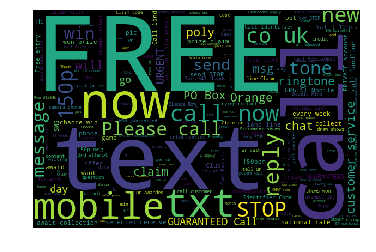

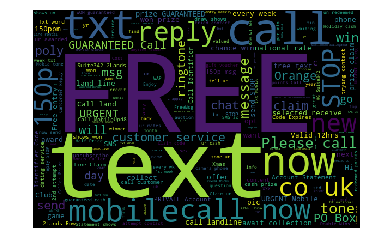

In [9]:
visualize('spam')
visualize('ham')

In [10]:
# 找出判斷錯誤的地方
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Romantic Paris. 2 nights, 2 flights from å£79 Book now 4 next year. Call 08704439680Ts&Cs apply.
We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
1000's of girls many local 2 u who r virgins 2 this & r ready 2 4fil ur every sexual need. Can u 4fil theirs? text CUTE to 69911(å£1.50p. m)
You have 1 new voicemail. Please call 08719181503
You have 1 new voicemail. Please call 08719181513.
Bought one ringtone and now getting texts costing 3 pound offering more tones etc
Hi if ur lookin 4 saucy daytime fun wiv busty married woman Am free all next week Chat now 2 sort time 09099726429 JANINExx Callså£1/minMobsmoreLKPOBOX177HP51FL
TheMob>Yo yo yo-Here comes a new selection of hot downloads for our members to get for FREE! Just click & open the next link sent to ur fone...
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is

In [11]:
# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)

Your daily text from me ÛÒ a favour this time
See the forwarding message for proof
Noice. Text me when you're here
JADE ITS PAUL. Y DIDNåÕT U TXT ME? DO U REMEMBER ME FROM BARMED? I WANT 2 TALK 2 U! TXT ME


In [ ]:
# 方法2:以數量為特徵

In [26]:
# 方法2:以數量為特徵
count_vectorizer = CountVectorizer(decode_error='ignore', stop_words='english', max_features=1500)
Xtrain = count_vectorizer.fit_transform(df_train)
Xtest = count_vectorizer.transform(df_test)

In [27]:
# 產生模型，訓練，印出
# model = MultinomialNB()
model = SVC(C=100, gamma=1, class_weight={1: 6})
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.999464237878382
test score: 0.8983143012506797


In [28]:
# 產生模型，訓練，印出
model = MultinomialNB()
#model = SVC(C=100, gamma=1, class_weight={1: 6})
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.985534422716314
test score: 0.9831430125067971


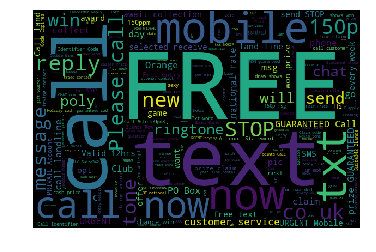

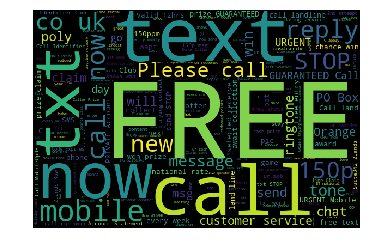

In [16]:
visualize('spam')
visualize('ham')

In [17]:
# 找出判斷錯誤的地方
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or c

In [18]:
# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)

See the forwarding message for proof
Noice. Text me when you're here
